In [228]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import scipy.stats as scipystats
import sklearn.feature_selection as skfeatureselect
import math
import time

In [264]:
def exact_mc_perm_test(xs, ys, nmc, statistic='normal'):
    n = len(xs)
    k = 0
    #Difference between means of both vectors
    diff = np.abs(np.mean(xs) - np.mean(ys))
    m_score = metrics.mutual_info_score(xs, ys)
    j_score = metrics.jaccard_score(xs, ys)
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        if statistic == 'normal':
            #increment if difference between means is greater than original difference
            k += diff <= np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
        elif statistic == 'mutual_info':
            #If mutual score of permuted version is lower, increment count
            k += m_score > metrics.mutual_info_score(zs[:n], zs[n:])
        elif statistic == 'jaccard_index':
            #If jscore of permuted version is lower, increment count
            k += j_score > metrics.jaccard_score(zs[:n], zs[n:])
    return (k+1)/ (nmc+1)

In [133]:
exact_mc_perm_test([1,1,0], [1,0,1], 1000, 'mutual_info')

0.8151848151848152

## Problem 1a

In [3]:
p1a = pd.read_csv("p1a.csv")
p1a

,0,0.1
0,1,0
1,0,0
2,0,0
3,1,0
4,1,0
5,0,0
6,1,0
7,0,0
8,1,0
9,0,0


In [351]:
gene1 = p1a['0']
gene2 = p1a['0.1']

In [364]:
gene1 = p1b['0.8']
gene2 = p1b['0.9']

In [461]:
temp = {
    "00": 0,
    "01": 0,
    "10": 0,
    "11": 0
}
p = '0.4'
o = '0.9'
for x in p1b.loc[:, [p, o]].iterrows():
    temp[str(x[1][p]) + str(x[1][o])] += 1
temp

{'00': 111, '01': 30, '10': 51, '11': 6}

In [294]:
temp = {
    "00": 0,
    "01": 0,
    "10": 0,
    "11": 0
}
for x in p1a.iterrows():
    temp[str(x[1]['0']) + str(x[1]['0.1'])] += 1
temp

{'00': 127, '01': 21, '10': 50, '11': 0}

#### Mutual Information

In [146]:
math.log(len(gene1), 2)

7.6293566200796095

In [385]:
metrics.normalized_mutual_info_score([1,1,0,0], [0,0,1,1])

1.0

In [366]:
metrics.normalized_mutual_info_score(gene1, gene2)

9.44840521693619e-05

In [367]:
metrics.mutual_info_score(gene1, gene2)

5.1610031400972645e-05

In [368]:
get_mutual_info_pval(gene1, gene2, 5000)

0.04939012197560488

In [217]:
def get_mutual_info_pval(v1, v2, N=10000):
    return exact_mc_perm_test(v1, v2, N, 'mutual_info')

#### Jaccard Index

In [454]:
metrics.jaccard_score([0,1,1], [0,0,0])

0.0

In [285]:
def get_jaccard_pval(v1, v2, N=10000):
    return exact_mc_perm_test(v1, v2, N, 'jaccard_index')

In [458]:
get_jaccard_pval([0,1,1], [1,1,1], 1000)

0.000999000999000999

#### Pearsons chi-squared

In [43]:
observed_frequencies = [temp['00'], temp['01'], temp['10'], temp['11']]
expected_frequencies = [len(p1a)/4]*4
print(observed_frequencies)
print(expected_frequencies)

[127, 21, 50, 0]
[49.5, 49.5, 49.5, 49.5]


In [352]:
obs = np.array([observed_frequencies, expected_frequencies])
scipystats.chi2_contingency(obs)

(95.05353420105166,
 1.798085918574209e-20,
 3,
 array([[88.25, 35.25, 49.75, 24.75],
        [88.25, 35.25, 49.75, 24.75]]))

In [355]:
get_chi_pval(gene1, gene2)

(95.05353420105166,
 1.798085918574209e-20,
 3,
 array([[88.25, 35.25, 49.75, 24.75],
        [88.25, 35.25, 49.75, 24.75]]))

In [308]:
scipy.stats.chisquare(f_obs=[15, 15, 15, 15])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [347]:
def get_chi_pval(v1, v2, N=10000):
    frequencies = {
        "00": 0,
        "01": 0,
        "10": 0,
        "11": 0
    }
    
    for x in range(len(v1)):
        frequencies[str(v1[x]) + str(v2[x])] += 1
        
    frequencies = list(frequencies.values())
        
    return scipy.stats.chi2_contingency(np.array([frequencies, expected_frequencies]))

## Problem 1b

In [170]:
p1b = pd.read_csv("p1b.csv")
p1b

,0,1,1.1,0.1,1.2,0.2,0.3,0.4,1.3,0.5,0.6,0.7,1.4,0.8,0.9
0,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0
4,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0
5,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
6,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [356]:
df = pd.DataFrame(columns=['MutualInfo', 'MutualInfoPval', 'JaccardIndex', 'JaccardPval', 'ChiSquared', 'ChiSquaredPval'])
start = time.time()
for idx, iterable_gene1 in enumerate(p1b.columns):
    for iterable_gene2 in p1b.columns[idx+1:]:
        gene1 = p1b[iterable_gene1]
        gene2 = p1b[iterable_gene2]
        #Do calculations with the two gene vectors
        mutual_info = metrics.normalized_mutual_info_score(gene1, gene2)
        mutual_info_pval = get_mutual_info_pval(gene1, gene2, 500)
        jaccard_index = metrics.jaccard_score(gene1, gene2)
        jaccard_pval = get_jaccard_pval(gene1, gene2, 500)
        chi_squared = get_chi_pval(gene1, gene2)
        chi_squared_stat = chi_squared[0]
        chi_squared_pval = chi_squared[1]
        #Add info to a dictionary
        df.loc[iterable_gene1 + ',' + iterable_gene2] = [mutual_info, mutual_info_pval, jaccard_index, jaccard_pval, chi_squared_stat, chi_squared_pval]
print(time.time() - start)

90.91792798042297


In [439]:
df['ChiSquaredPvalNorm'] = df['ChiSquaredPval'].apply(lambda x: int(str(x)[-3:]))

In [443]:
df

,MutualInfo,MutualInfoPval,JaccardIndex,JaccardPval,ChiSquared,ChiSquaredPval,ChiSquaredPvalNorm
"0,1",0.081050,1.000000,0.000000,0.001996,92.534320,6.253724e-20,-20
"0,1.1",0.429617,1.000000,0.649351,1.000000,78.368852,6.868645e-17,-17
"0,0.1",0.856890,1.000000,0.925926,1.000000,134.349937,6.245078e-29,-29
"0,1.2",0.083885,1.000000,0.000000,0.001996,90.921263,1.388902e-19,-19
"0,0.2",0.215702,1.000000,0.007812,0.001996,55.075780,6.615272e-12,-12
"0,0.3",0.885523,1.000000,0.944444,1.000000,136.859265,1.797234e-29,-29
"0,0.4",0.652287,1.000000,0.819672,1.000000,111.720080,4.678806e-24,-24
"0,1.3",0.498261,1.000000,0.698630,1.000000,87.454583,7.712467e-19,-19
"0,0.5",0.564999,1.000000,0.761905,1.000000,101.778084,6.443813e-22,-22
"0,0.6",0.249562,1.000000,0.505263,1.000000,53.684867,1.309846e-11,-11


In [343]:
results

,MutualInfo,MutualInfoPval,JaccardIndex,JaccardPval,ChiSquared,ChiSquaredPval
"0,1",0.081050,0.999800,0.000000,0.000200,175.454545,8.452912e-38
"0,1.1",0.429617,1.000000,0.649351,1.000000,159.292929,2.604470e-34
"0,0.1",0.856890,1.000000,0.925926,1.000000,271.737374,1.298923e-58
"0,1.2",0.083885,1.000000,0.000000,0.000200,171.373737,6.428214e-37
"0,0.2",0.215702,1.000000,0.007812,0.000200,68.383838,9.468300e-15
"0,0.3",0.885523,1.000000,0.944444,1.000000,273.636364,5.043408e-59
"0,0.4",0.652287,1.000000,0.819672,1.000000,232.989899,3.121383e-50
"0,1.3",0.498261,1.000000,0.698630,1.000000,177.676768,2.800009e-38
"0,0.5",0.564999,1.000000,0.761905,1.000000,219.090909,3.156710e-47
"0,0.6",0.249562,1.000000,0.505263,1.000000,97.555556,5.212326e-21


In [428]:
a = 0.05
series = df['ChiSquaredPvalNorm'].sort_values()
adj_ps = []
for x,y in enumerate(series):
    adj_p = (x/len(series)) * a
    adj_ps.append(adj_p)
new = pd.DataFrame(columns=['OriginalPval', 'BHThreshold'])
new['OriginalPval'] = series
new['BHThreshold'] = adj_ps

In [442]:
pd.set_option('display.max_rows', 106)

In [429]:
new 

,OriginalPval,BHThreshold
"1,1.2",3.866433e-15,0.000000
"0.1,0.3",1.007381e-09,0.000476
"0,0.3",1.797234e-09,0.000952
"0,0.1",6.245078e-09,0.001429
...,...,...
"0.2,0.8",1.125806e+14,0.048095
"1.1,0.8",2.675222e+14,0.048571
"1.4,0.8",9.990805e+14,0.049048
"0.6,0.8",2.528920e+16,0.049524


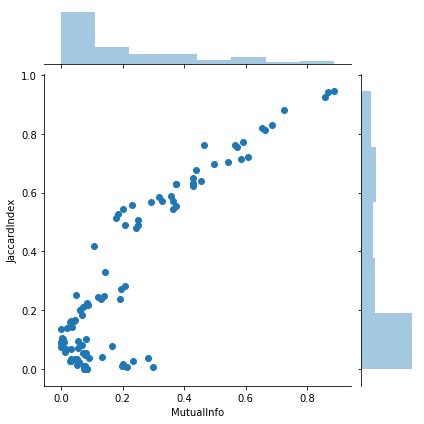

In [400]:
sns.jointplot(x='MutualInfo', y='JaccardIndex', data=df)

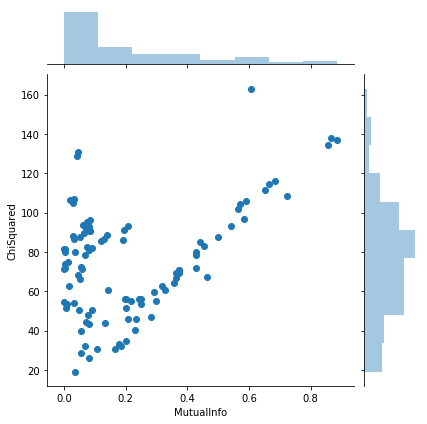

In [401]:
sns.jointplot(x='MutualInfo', y='ChiSquared', data=df)

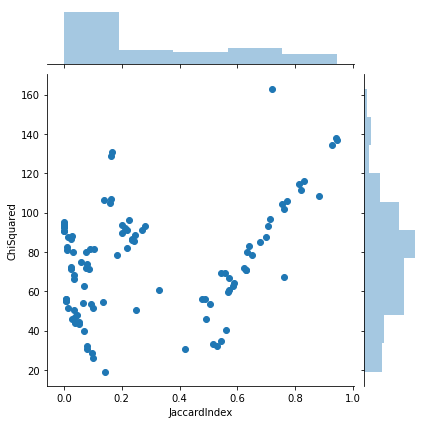

In [402]:
sns.jointplot(x='JaccardIndex', y='ChiSquared', data=df)

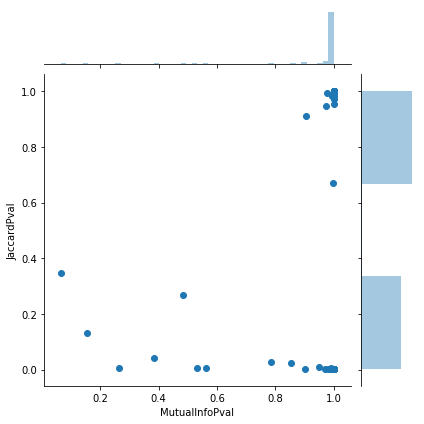

In [403]:
sns.jointplot(x='MutualInfoPval', y='JaccardPval', data=df)

In [444]:
tempor = df.copy()
tempor.drop('0.6,0.8', inplace=True)

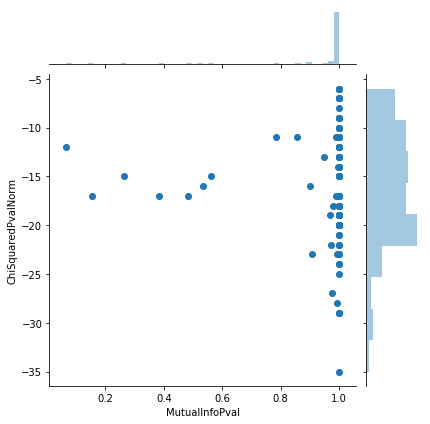

In [445]:
sns.jointplot(x='MutualInfoPval', y='ChiSquaredPvalNorm', data=tempor)

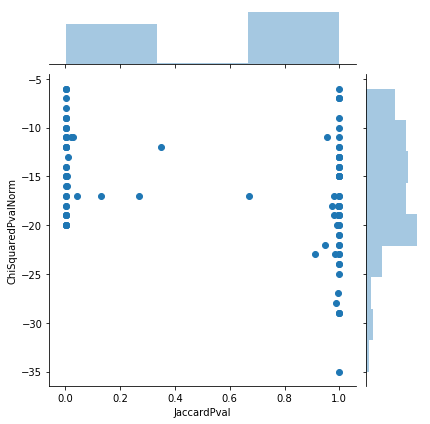

In [446]:
sns.jointplot(x='JaccardPval', y='ChiSquaredPvalNorm', data=tempor)

# Problem 2

In [467]:
p2a = pd.read_csv('p2a.csv', header=None)
p2b = pd.read_csv('p2b.csv', header=None)
p2c = pd.read_csv('p2c.csv', header=None)

In [468]:
p2a

,0,1
0,-0.649010,2.800500
1,1.181200,0.023066
2,-0.758450,-0.547210
3,-1.109600,-0.129460
4,-0.845550,-0.362620
5,-0.572660,-0.965900
6,-0.558680,-1.550100
7,0.178380,0.947620
8,-0.196860,-1.811000
9,0.586440,2.693800


In [469]:
scipystats.pearsonr(p2a[0], p2a[1])

(0.3808750357837301, 1.0409455130065314e-83)

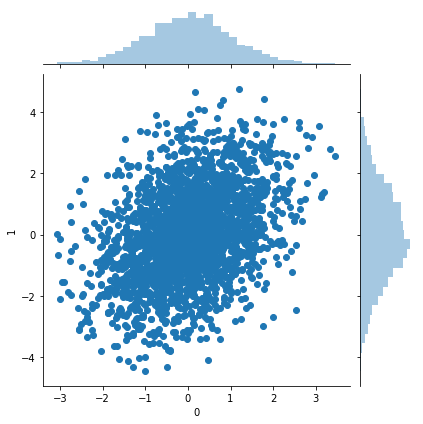

In [475]:
sns.jointplot(x=0, y=1, data=p2a)

In [473]:
p2b

,0,1
0,-0.343000,-0.720060
1,1.666300,1.042800
2,-0.766710,-0.271480
3,2.635500,1.778100
4,-0.016814,0.220030
5,0.304160,0.461790
6,0.684340,0.911890
7,0.055808,0.352350
8,-1.401800,-0.705830
9,-1.360100,-0.541800


In [478]:
scipystats.pearsonr(p2b[0], p2b[1])

(0.9312196333264214, 3.737321008438933e-49)

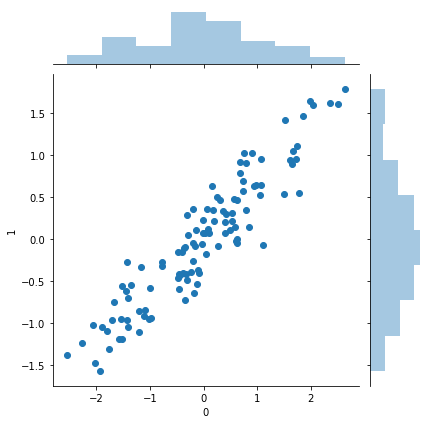

In [479]:
sns.jointplot(x=0, y=1, data=p2b)

In [480]:
p2c

,0,1
0,-0.343000,0.202900
1,1.666300,1.038100
2,-0.766710,0.438880
3,2.635500,1.572600
4,-0.016814,-0.007449
5,0.304160,0.124900
6,0.684340,0.344880
7,0.055808,0.049331
8,-1.401800,0.832630
9,-1.360100,0.759980


In [481]:
scipystats.pearsonr(p2c[0], p2c[1])

(0.041178997776831795, 0.059195916605473436)

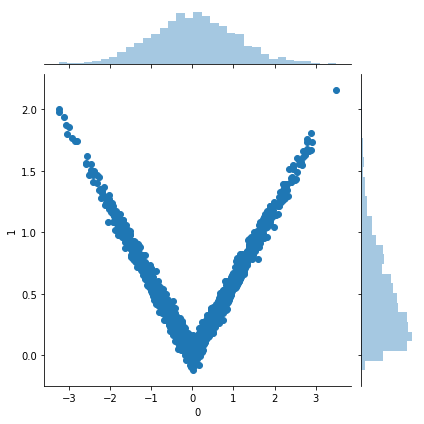

In [482]:
sns.jointplot(x=0, y=1, data=p2c)